<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#05445e;overflow:hidden;font-weight:800">Algorithm Optimisation</div>

<div style='padding:15px;border-radius:7px;color:#154360; background-color:#f5eef8'><b><span style='font-size:20px'>Contents</span></b><br><br>
    <a href='#01' style="text-decoration:none">01 | Libraries</a><br>
    <a href='#02' style="text-decoration:none">02 | Data Import</a><br>
    <a href='#03' style="text-decoration:none">03 | Data Preprocessing</a><br>
    <a href='#04' style="text-decoration:none">04 | Modeling</a><br>

</div>

<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#05445e;overflow:hidden;font-weight:800">01 | Libraries<a id='01'></a></div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [3]:
# display charts withing the notebook
%matplotlib inline

<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#05445e;overflow:hidden;font-weight:800">02 | Data Import<a id='02'></a></div>

In [4]:
#define the path for the data
path = r'/Users/niphomkhwane/Documents/A_Data Analytics/Module 7 - Machine Learning with Python /02 Data'

In [5]:
# Upload the file
climate_knn = pd.read_csv(os.path.join(path, 'Prepared Data', 'climate_scaled.csv'), index_col = 0)

In [6]:
climate_knn.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0           0.660514          -0.02793        0.826097       -0.001949   
1           0.244897          -0.02793        0.735760       -0.001949   
2           1.076130          -0.02793        1.277781       -0.001949   
3          -1.001953          -0.02793        1.458455       -0.001949   
4           0.244897          -0.02793        1.729466       -0.001949   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0               -1.101066            -0.265148         -0.179228   
1               -1.058108             1.658760         -0.179228   
2               -1.251420             0.155707         -0.179228   
3               -0.821838            -0.445514         -0.179228   
4               -0.746661            -0.164944         -0.179228   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
0       -0.902918        -0.528623       -0.845652       -0.478356   
1       -0.810126        -0.582946       -0.462450       -0.569988   
2       -1.065304        -0.257010       -0.186545       -0.592896   
3       -0.114186        -0.555784       -0.385810       -0.512718   
4        0.187388        -1.003946       -1.075573       -1.039603   

   BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0             -1.206433           0.905270           0.321771   
1              0.652846           1.119118           0.016838   
2              0.652846           0.620141           0.109644   
3              1.396557           1.760659           1.289601   
4              1.396557           2.188353           1.528244   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                  -0.743149               -0.371315           0.283983   
1                  -1.418387               -0.371315          -1.333204   
2                  -0.968228               -0.371315          -0.524611   
3                  -1.418387               -0.371315          -1.333204   
4                  -1.418387               -0.253655          -1.333204   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0           -1.016876          -1.220210          -0.949203   
1           -1.107669          -0.818702          -1.298119   
2           -1.084971          -1.168403          -1.098738   
3           -1.209812          -1.362681          -1.437685   
4           -1.209812          -1.012980          -1.457623   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0              -0.25524          -0.010098          -0.005876   
1              -0.25524          -0.010098          -0.005876   
2              -0.25524          -0.010098          -0.005876   
3              -0.25524          -0.010098          -0.005876   
4              -0.25524          -0.010098          -0.005876   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                  -1.118537               -0.321868          -0.773378   
1                  -1.415938                0.371622          -1.344065   
2                  -1.278676               -0.344984          -1.195190   
3                  -1.404499               -0.344984          -1.344065   
4                  -1.404499               -0.344984          -1.344065   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0           -1.099163          -1.119431          -1.136839   
1           -1.110927          -0.878727          -1.341204   
2           -1.063873          -0.838610          -1.116403   
3           -1.146217          -1.012452          -1.208367   
4           -1.087400          -0.918844          -1.116403   

   DEBILT_cloud_cover  DEBILT_wind_speed  DEBILT_humidity  DEBILT_pressure  \
0            0.713782           2.781340         0.357839        -1.232471   
1            1.176060           0.446070         0.866945        -0.987868   
2            0.251504          -0.202616         1.0

In [7]:
# Upload the pleasant weather data
pleasant_weather = pd.read_csv(os.path.join(path, 'Raw Data', 'pleasant_weather.csv'))

In [8]:
pleasant_weather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#05445e;overflow:hidden;font-weight:800">03 | Data Preprocessing<a id='03'></a></div>

In [9]:
# Reduce to just the temperatures columns
df = climate_knn[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',
    'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
    'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
    'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
    'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
    'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
    'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
    'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
    'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
    'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
    'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
    'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
    'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max','STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
    'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [10]:
df

DATE  MONTH  BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
0      19600101      1        -0.528623       -0.845652       -0.478356   
1      19600102      1        -0.582946       -0.462450       -0.569988   
2      19600103      1        -0.257010       -0.186545       -0.592896   
3      19600104      1        -0.555784       -0.385810       -0.512718   
4      19600105      1        -1.003946       -1.075573       -1.039603   
...         ...    ...              ...             ...             ...   
22945  20221027     10         0.747959        0.779123        0.724314   
22946  20221028     10         0.856604        1.223637        0.781585   
22947  20221029     10         0.856604        1.039701        0.838855   
22948  20221030     10         0.680055        0.809780        0.689952   
22949  20221031     10         0.422023        0.549202        0.472326   

       BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0               -1.016876          -1.220210          -0.949203   
1               -1.107669          -0.818702          -1.298119   
2               -1.084971          -1.168403          -1.098738   
3               -1.209812          -1.362681          -1.437685   
4               -1.209812          -1.012980          -1.457623   
...                   ...                ...                ...   
22945            0.628750           0.463536           0.695687   
22946            0.367720           0.269258           0.376678   
22947            0.083991           0.010220           0.077607   
22948            0.265577           0.074979           0.346771   
22949            0.197483           0.243354           0.097545   

       BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0               -1.099163          -1.119431          -1.136839   
1               -1.110927          -0.878727          -1.341204   
2               -1.063873          -0.838610          -1.116403   
3               -1.146217          -1.012452          -1.208367   
4               -1.087400          -0.918844          -1.116403   
...                   ...                ...                ...   
22945           -0.005167          -0.009517          -0.002613   
22946           -0.005167          -0.009517          -0.002613   
22947           -0.005167          -0.009517          -0.002613   
22948           -0.005167          -0.009517          -0.002613   
22949           -0.005167          -0.009517          -0.002613   

       DEBILT_temp_mean  DEBILT_temp_min  DEBILT_temp_max  \
0             -0.114356         0.263326        -0.411047   
1             -0.367511         0.090631        -0.781002   
2             -0.509912        -0.220221        -0.561770   
3             -0.525734        -0.392916        -0.534366   
4             -0.320045        -0.600150        -0.383643   
...                 ...              ...              ...   
22945          0.898267         1.195880         0.739922   
22946          0.945734         0.764142         0.890644   
22947          0.914089         0.591447         0.972857   
22948          0.692578         0.764142         0.849538   
22949          0.439422         0.142439         0.301458   

       DUSSELDORF_temp_mean  DUSSELDORF_temp_min  DUSSELDORF_temp_max  \
0                 -0.105836             0.060555            -0.410423   
1                 -0.370915             0.125463            -0.473486   
2                 -0.532908             0.044328            -0.713127   
3                 -0.577088            -0.491160            -0.851866   
4                 -0.444548            -0.069260            -0.473486   
...                     ...                  ...                  ...   
22945              1.042841             1.131531             0.838231   
22946              1.278467             1.423615             1.153548   
22947              1.101748             1.099077             0.913907   
22948              0.880848          

In [11]:
# Dropping unrequired columns from both datasets and create the 'X' and 'y' matrices
X = df.drop(['DATE','MONTH'], axis=1)
y = pleasant_weather.drop(['DATE'], axis=1)


In [12]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#05445e;overflow:hidden;font-weight:800">04 | Modeling<a id='04'></a></div>

In [13]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [15]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train))
    test_acc[i] = knn.score(X_test, np.array(y_test))

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

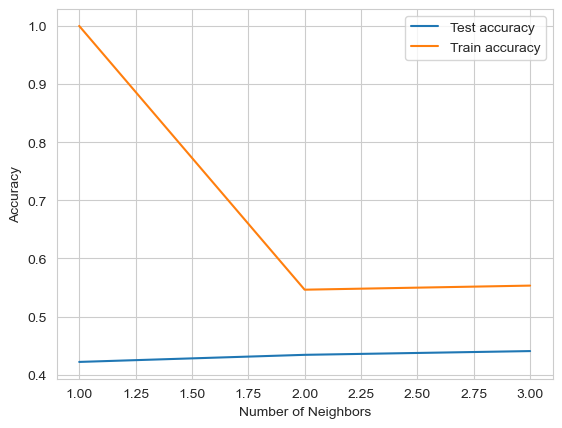

In [16]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig('neighbors_vs_accuracy.png', dpi=300, bbox_inches='tight')
plt.show

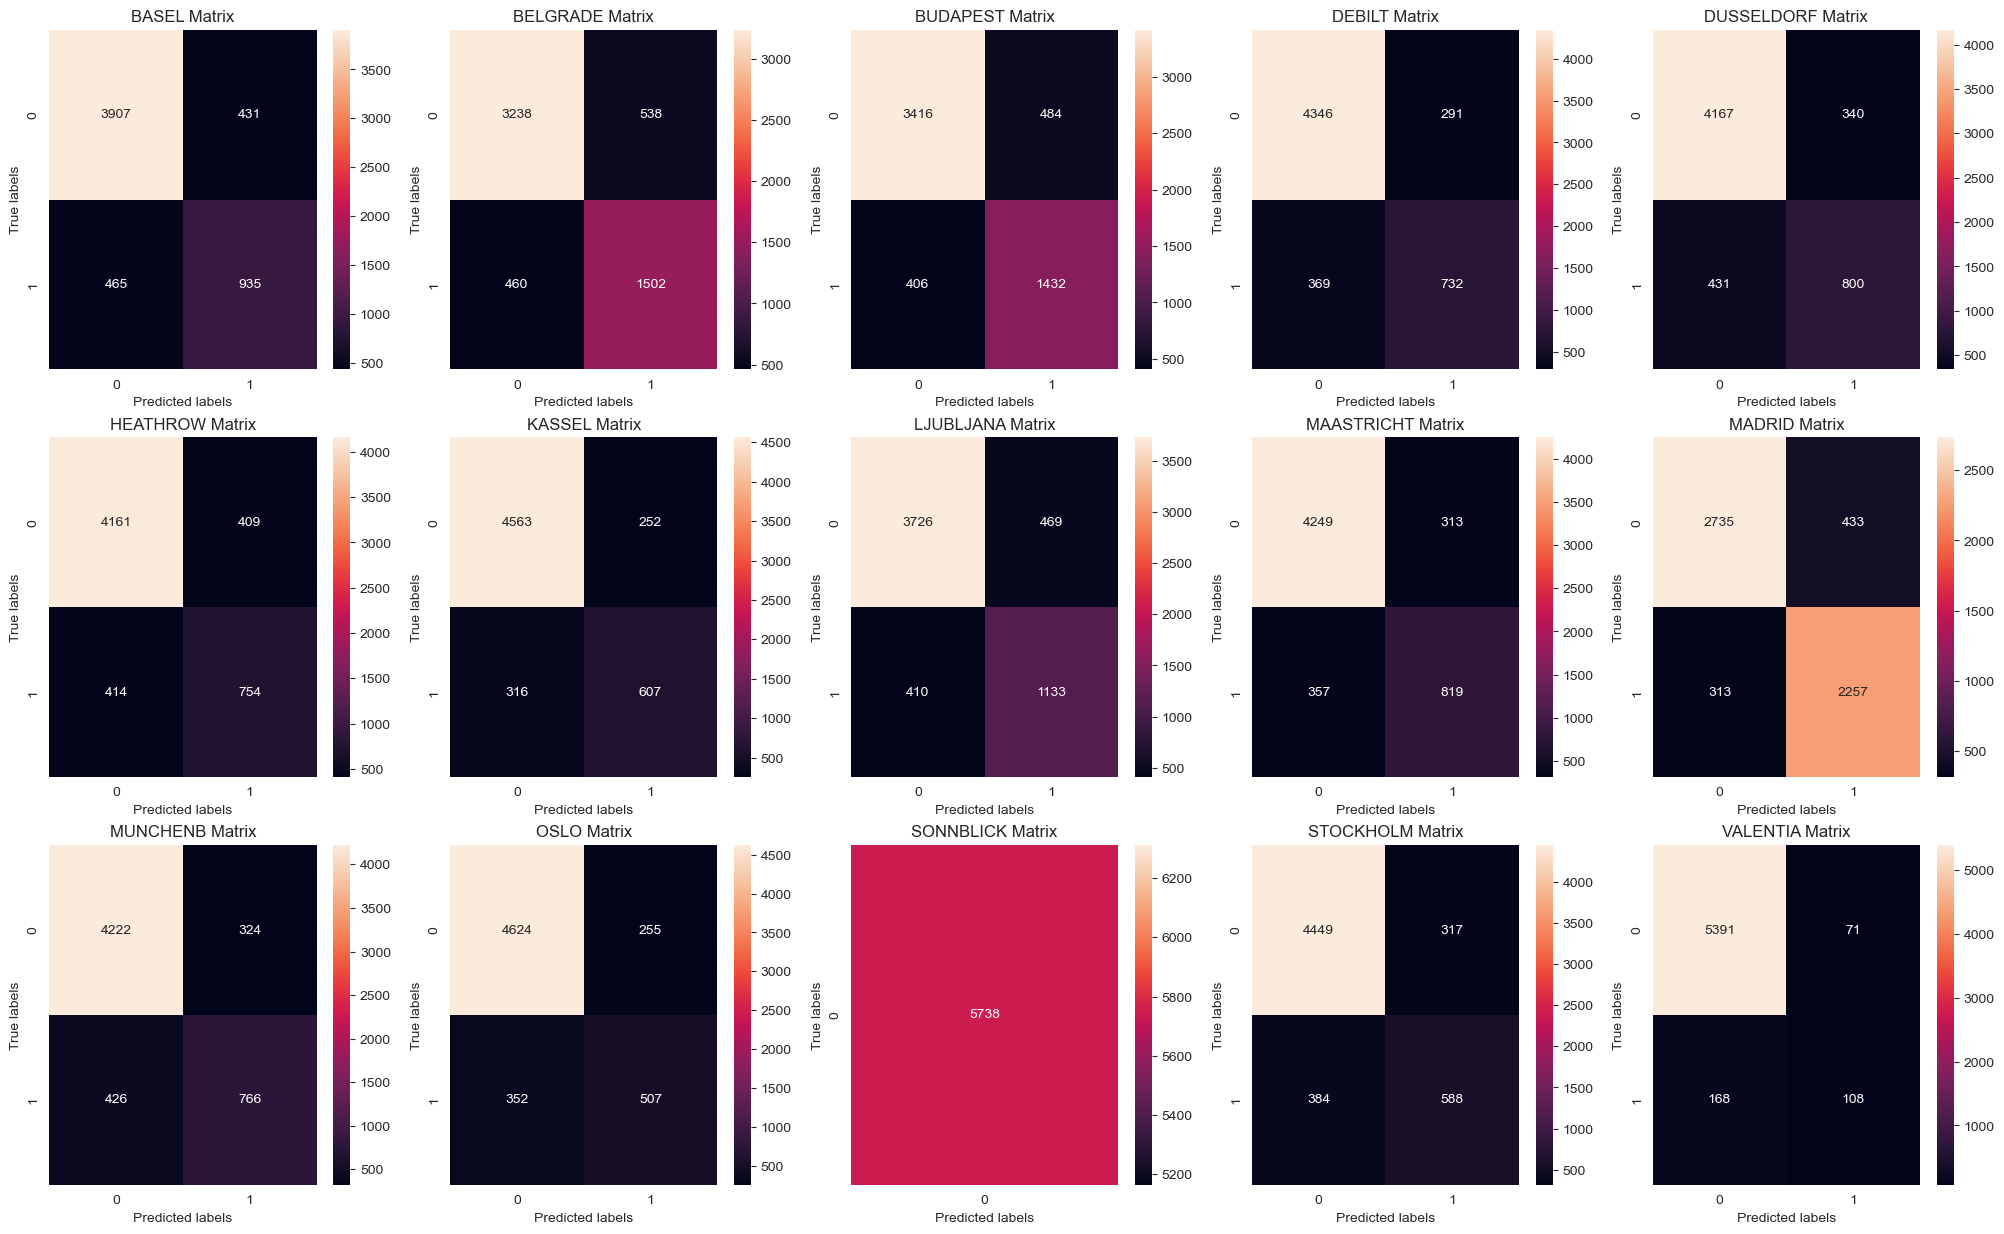

In [62]:
#Confusion matrix based on the last "k" in the sequence
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
num_locations = len(locations)
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        
figure.savefig("confusion_matrices.png", dpi=300, bbox_inches='tight')

In [36]:
print(y_test.columns)

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')


In [37]:
for i in range(3):
    for j in range(5):
        name = locations[count]
        column_name = name + key
        print(f"Trying to access column: {column_name}")
        if column_name in y_test.columns:
            cm = confusion_matrix(y_test.loc[:, column_name], y_pred[:, count])
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        else:
            print(f"Column '{column_name}' not found in y_test columns.")
        count += 1

Trying to access column: Predicted Negative_pleasant_weather
Column 'Predicted Negative_pleasant_weather' not found in y_test columns.
Trying to access column: Predicted Positive_pleasant_weather
Column 'Predicted Positive_pleasant_weather' not found in y_test columns.


IndexError: list index out of range

In [27]:
mcm = multilabel_confusion_matrix(y_test, y_pred)



In [28]:
dfs = []
for i, matrix in enumerate(mcm):
    df = pd.DataFrame(matrix, index=["Actual Negative", "Actual Positive"],
                      columns=["Predicted Negative", "Predicted Positive"])
    dfs.append(df)

# Print each DataFrame for a readable format
for i, df in enumerate(dfs):
    print(f"Confusion Matrix for Label {i}")
    print(df)
    print("\n" + "-"*30 + "\n")

Confusion Matrix for Label 0
                 Predicted Negative  Predicted Positive
Actual Negative                3907                 431
Actual Positive                 465                 935

------------------------------

Confusion Matrix for Label 1
                 Predicted Negative  Predicted Positive
Actual Negative                3238                 538
Actual Positive                 460                1502

------------------------------

Confusion Matrix for Label 2
                 Predicted Negative  Predicted Positive
Actual Negative                3416                 484
Actual Positive                 406                1432

------------------------------

Confusion Matrix for Label 3
                 Predicted Negative  Predicted Positive
Actual Negative                4346                 291
Actual Positive                 369                 732

------------------------------

Confusion Matrix for Label 4
                 Predicted Negative  Predicted Posi

In [29]:
output_file = "multilabel_confusion_matrix.xlsx"

# Use ExcelWriter to export multiple DataFrames to different sheets
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    for i, matrix in enumerate(mcm):
        # Convert each confusion matrix to a DataFrame
        df = pd.DataFrame(matrix, index=["Actual Negative", "Actual Positive"],
                          columns=["Predicted Negative", "Predicted Positive"])
        
        # Write each DataFrame to a separate sheet
        sheet_name = f"Label_{i}"
        df.to_excel(writer, sheet_name=sheet_name)
    
    writer.save()

print(f"Confusion matrices saved to {output_file}")

Confusion matrices saved to multilabel_confusion_matrix.xlsx


/var/folders/2r/jyy262hj1gl0ql58ltnsw4rr0000gn/T/ipykernel_41114/2969028597.py:14: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
/Users/niphomkhwane/opt/anaconda3/lib/python3.9/site-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


<div style="padding:15px;color:#189ab4;font-size:200%;text-align:left;background-color:#c3ceda;font-weight:400">4.2 | München<a id='42'></a></div>

<b><span style='color:#154360'>The next weather station we look at is München/Munich and for the year 2001
    </span></b>

In [478]:
climate_munchen = df[df['Year'] == '2001']

In [479]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 for 1988 since it's a leap year!)

i = np.arange(0.01,3.66,0.01) 
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [507]:
n_rows = climate_munchen.shape[0]
n_rows

365

In [508]:
#Translating the weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=climate_munchen['MUNCHENB_temp_mean'].to_numpy().reshape(n_rows,1) 

In [340]:
X.shape, y.shape

((365, 2), (365, 1))

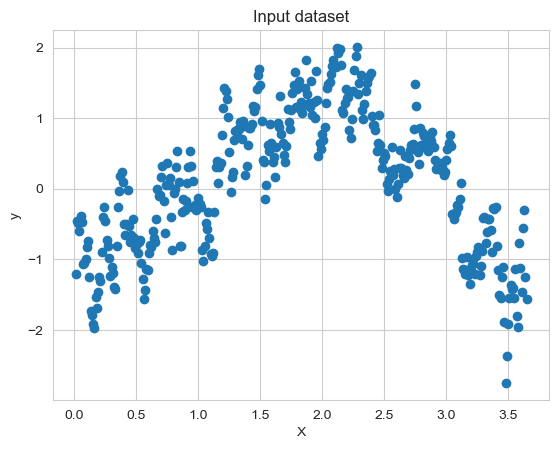

In [341]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=climate_munchen['MUNCHENB_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [342]:
#what is the min temperature? 
climate_munchen['MUNCHENB_temp_mean'].min()

-2.7540824591162383

In [343]:
#what is the max temperature? 
climate_munchen['MUNCHENB_temp_mean'].max()

2.0089526649487808

In [481]:
#This computes the loss function for the gradiant descent.

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [482]:
compute_cost(X,y)

array([0.35838285])

In [483]:
#This is the gradiant descent function.

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [484]:
%%time


num_iterations=6000
theta_init=np.array([[-2],[-4]]) 
alpha=0.0001 

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 4.33 s, sys: 18.1 ms, total: 4.34 s
Wall time: 4.36 s


In [485]:
theta

array([[-0.29291473],
       [-0.02522193]])

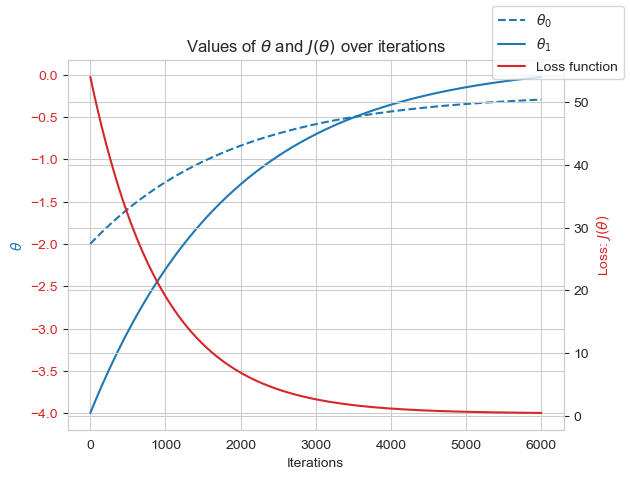

In [486]:


fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [497]:
%%time
# theta range
theta0_vals = np.linspace(-5,5,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-5,5,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 1.51 s, sys: 14.9 ms, total: 1.53 s
Wall time: 1.58 s


In [498]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()


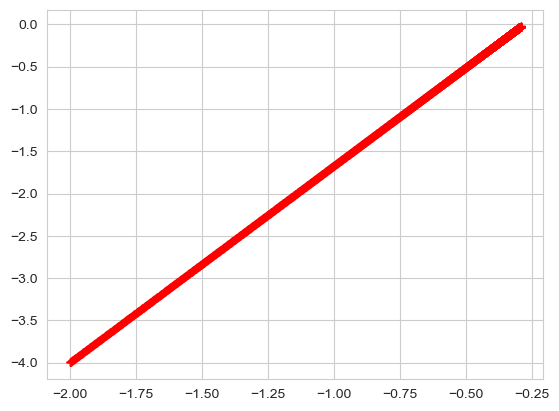

In [499]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [502]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=10 #<---start with the same iterations as above
theta_init=np.array([[1],[1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

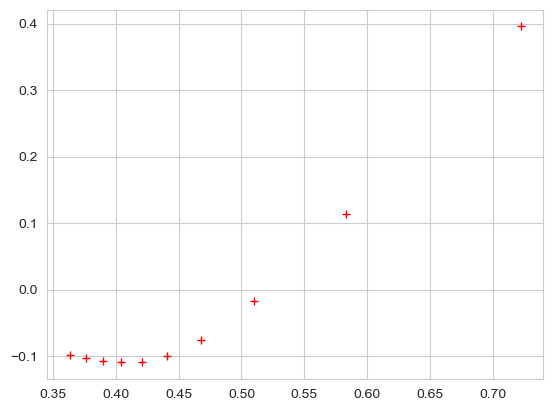

In [503]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

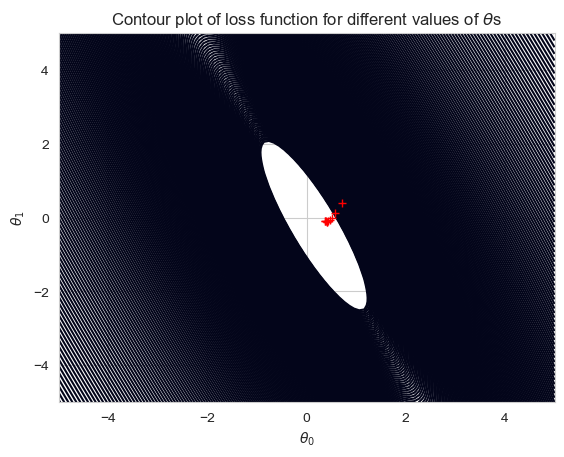

In [504]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

<div style="padding:15px;color:#189ab4;font-size:200%;text-align:left;background-color:#c3ceda;font-weight:400">4.3 | Oslo<a id='43'></a></div>

<b><span style='color:#154360'>The next weather station we look at is Oslo and for the year 2008
    </span></b>

In [505]:
climate_oslo = df[df['Year'] == '2001']

In [509]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 for 1988 since it's a leap year!)

i = np.arange(0.01,3.66,0.01) 
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [510]:
n_rows = climate_oslo.shape[0]
n_rows

365

In [511]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=climate_oslo['OSLO_temp_mean'].to_numpy().reshape(n_rows,1)

In [512]:
X.shape, y.shape

((365, 2), (365, 1))

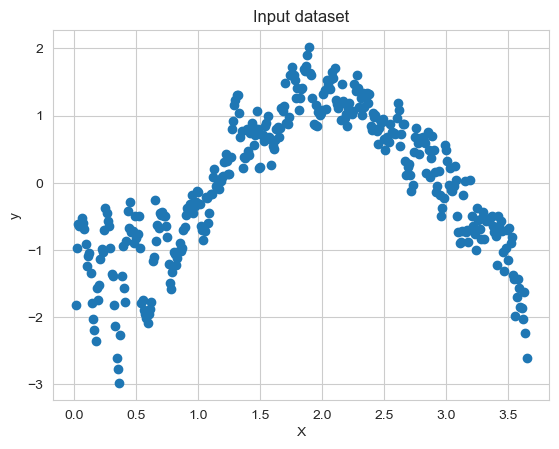

In [513]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=climate_oslo['OSLO_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [515]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
climate_oslo['OSLO_temp_mean'].min()

-2.977590859818025

In [516]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
climate_oslo['OSLO_temp_mean'].max()

2.021968325793007

In [517]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [518]:
compute_cost(X,y)

array([0.54954928])

In [519]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [529]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=200 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-4],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.001 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 114 ms, sys: 6.1 ms, total: 120 ms
Wall time: 137 ms


In [530]:
theta

array([[-2.35529184],
       [-1.30452844]])

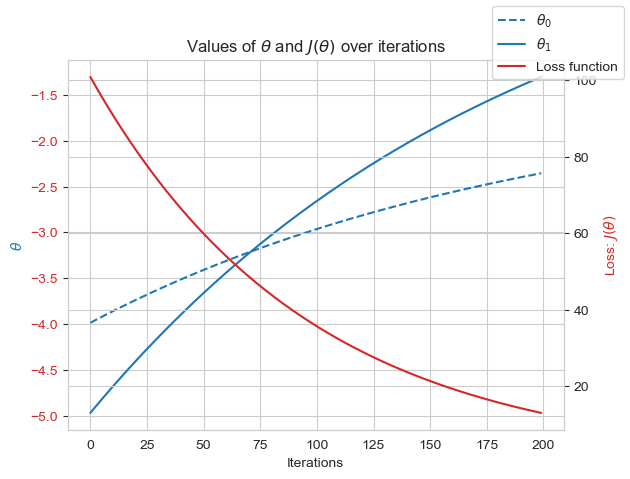

In [531]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

In [534]:
%%time
# theta range
theta0_vals = np.linspace(-5,5,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-5,5,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 1.51 s, sys: 15.3 ms, total: 1.52 s
Wall time: 1.51 s


In [535]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

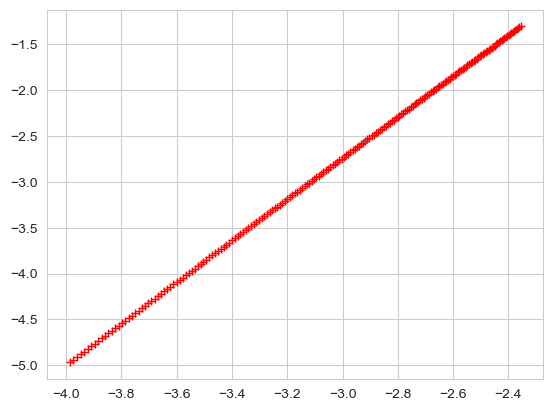

In [536]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [558]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=200 #<---start with the same iterations as above
theta_init=np.array([[0.5],[0]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.0001 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

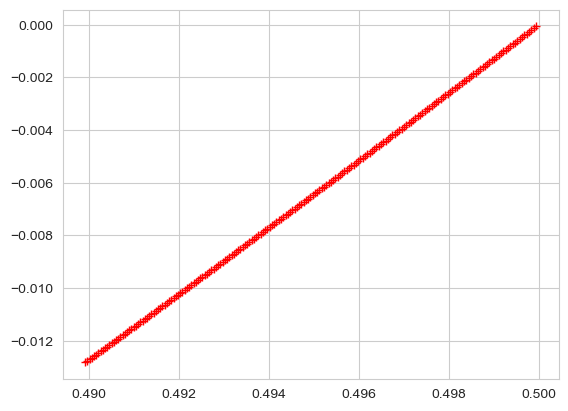

In [559]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

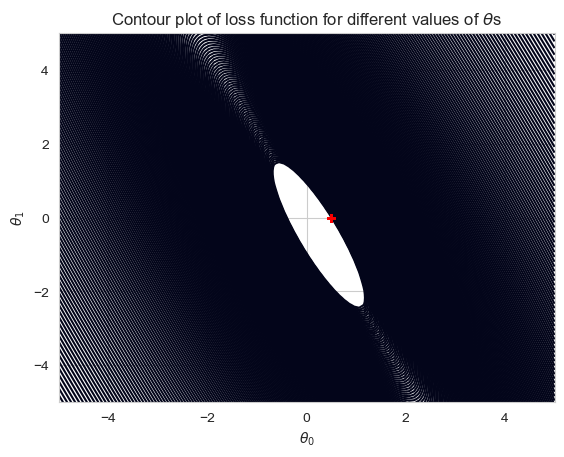

In [560]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');